This Jupyter Notebook is the visualizations for the whr/wdi data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read in cleaned csv's for visualizations
whr_wdi_left = pd.read_csv('../data/whr_wdi_left_merge.csv')
left_wide = pd.read_csv('../data/whr_wdi_left_merge_wide.csv')
left_wide_advanced = pd.read_csv('../data/whr_wdi_left_merge_wide_advanced.csv')

print('CSVs read in successfully')

CSVs read in successfully


In [3]:
# Check columns
print(whr_wdi_left.columns)
print(left_wide.columns)
print(left_wide_advanced.columns)

Index(['Iso3', 'Country', 'Year', 'Happiness Rank', 'Happiness Score',
       'GDP Contribution', 'Life Expectancy Contribution', 'Corruption Impact',
       'series_name', 'value', 'Income Level', 'Region', 'longitude',
       'latitude', 'iso2Code'],
      dtype='object')
Index(['Iso3', 'Country', 'Year', 'Happiness Rank', 'Happiness Score',
       'Health Expenditure (% GDP)', 'Health Expenditure (per capita)',
       'GDP per Capita', 'Education Expenditure (% GDP)', 'Adult Literacy %',
       'Primary School Enrollment %', 'Secondary School Enrollment %',
       'Tertiary School Enrollment %', 'Income Level', 'Region', 'longitude',
       'latitude'],
      dtype='object')
Index(['Iso3', 'Country', 'Year', 'Happiness Rank', 'Happiness Score',
       'GDP Contribution', 'Life Expectancy Contribution', 'Corruption Impact',
       'Health Expenditure (% GDP)', 'Health Expenditure (per capita)',
       'GDP per Capita', 'Education Expenditure (% GDP)', 'Adult Literacy %',
       'Prim

In [4]:
# Check data
print(whr_wdi_left.shape)
whr_wdi_left.head()

(14533, 15)


Iso3      Country  Year  Happiness Rank  Happiness Score  GDP Contribution  \
0  AFG  Afghanistan  2011             131            4.258               NaN   
1  AFG  Afghanistan  2011             131            4.258               NaN   
2  AFG  Afghanistan  2011             131            4.258               NaN   
3  AFG  Afghanistan  2011             131            4.258               NaN   
4  AFG  Afghanistan  2011             131            4.258               NaN   

   Life Expectancy Contribution  Corruption Impact  \
0                           NaN                NaN   
1                           NaN                NaN   
2                           NaN                NaN   
3                           NaN                NaN   
4                           NaN                NaN   

                                         series_name   value Income Level  \
0                       GDP per capita (current US$)  606.69   Low income   
1  Current health expenditure per capita (current...   52.19   Low income   
2              Current health expenditure (% of GDP)    8.56   Low income   
3  Government expenditure on education, total (% ...    3.46   Low income   
4  Literacy rate, adult total (% of people ages 1...   31.45   Low income   

                                              Region  longitude  latitude  \
0  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228   
1  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228   
2  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228   
3  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228   
4  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228   

  iso2Code  
0       AF  
1       AF  
2       AF  
3       AF  
4       AF

In [5]:
print(left_wide.shape)
left_wide.head()

(1794, 17)


Iso3      Country  Year  Happiness Rank  Happiness Score  \
0  AFG  Afghanistan  2011             131            4.258   
1  AFG  Afghanistan  2012             143            4.040   
2  AFG  Afghanistan  2014             153            3.575   
3  AFG  Afghanistan  2015             153            3.360   
4  AFG  Afghanistan  2016             141            3.794   

   Health Expenditure (% GDP)  Health Expenditure (per capita)  \
0                        8.56                            52.19   
1                        7.90                            52.45   
2                        9.53                            60.05   
3                       10.11                            59.92   
4                       11.82                            61.37   

   GDP per Capita  Education Expenditure (% GDP)  Adult Literacy %  \
0          606.69                           3.46             31.45   
1          651.42                           2.60               NaN   
2          625.05                           3.70               NaN   
3          565.57                           3.26             33.75   
4          522.08                           4.54               NaN   

   Primary School Enrollment %  Secondary School Enrollment %  \
0                       101.54                          52.45   
1                       106.58                          54.37   
2                       109.83                          54.29   
3                       106.77                          53.15   
4                       106.78                          53.44   

   Tertiary School Enrollment % Income Level  \
0                          3.69   Low income   
1                           NaN   Low income   
2                          8.40   Low income   
3                           NaN   Low income   
4                           NaN   Low income   

                                              Region  longitude  latitude  
0  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228  
1  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228  
2  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228  
3  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228  
4  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228

In [6]:
# Check data
print(left_wide_advanced.shape)
left_wide_advanced.head()

(795, 20)


Iso3      Country  Year  Happiness Rank  Happiness Score  GDP Contribution  \
0  AFG  Afghanistan  2019             153            2.567             0.301   
1  AFG  Afghanistan  2020             149            2.523             0.370   
2  AFG  Afghanistan  2021             146            2.404             0.758   
3  AFG  Afghanistan  2022             137            1.859             0.645   
4  AFG  Afghanistan  2023             143            1.721             0.628   

   Life Expectancy Contribution  Corruption Impact  \
0                         0.266              0.001   
1                         0.126              0.010   
2                         0.289              0.005   
3                         0.087              0.059   
4                         0.242              0.088   

   Health Expenditure (% GDP)  Health Expenditure (per capita)  \
0                       14.83                            74.06   
1                       15.53                            80.09   
2                       21.51                            81.52   
3                       23.09                            80.65   
4                         NaN                              NaN   

   GDP per Capita  Education Expenditure (% GDP)  Adult Literacy %  \
0          496.60                            NaN               NaN   
1          510.79                            NaN             35.99   
2          356.50                            NaN             37.27   
3          357.26                            NaN               NaN   
4          413.76                            NaN               NaN   

   Primary School Enrollment %  Secondary School Enrollment %  \
0                       109.08                            NaN   
1                          NaN                            NaN   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   

   Tertiary School Enrollment % Income Level  \
0                           NaN   Low income   
1                         10.85   Low income   
2                           NaN   Low income   
3                           NaN   Low income   
4                           NaN   Low income   

                                              Region  longitude  latitude  
0  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228  
1  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228  
2  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228  
3  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228  
4  Middle East, North Africa, Afghanistan & Pakistan    69.1761   34.5228

Choloropleth map of world happiness report scores

In [10]:
# Filter data for 2024
whr_wdi_left_2024 = whr_wdi_left[whr_wdi_left['Year'] == 2024]

# Create choropleth map
fig = px.choropleth(
    whr_wdi_left_2024,
    locations='Iso3',
    color='Happiness Score',
    hover_name='Country',
    hover_data=['Region', 'Income Level'],
    #animation_frame='Year',  # Adds time slider if not filtering by year
    color_continuous_scale=px.colors.sequential.YlGnBu,
    range_color=[4, 8],  # ensures colors reflect the full range
    title='Global Happiness Scores (2024)'
)

# Optional: make the layout bigger and remove unnecessary gaps
fig.update_layout(
    width=1200,
    height=700,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title='Happiness Score'
    )
)

# Show the map
fig.show()

GDP vs Happiness 2024 (Scatter)

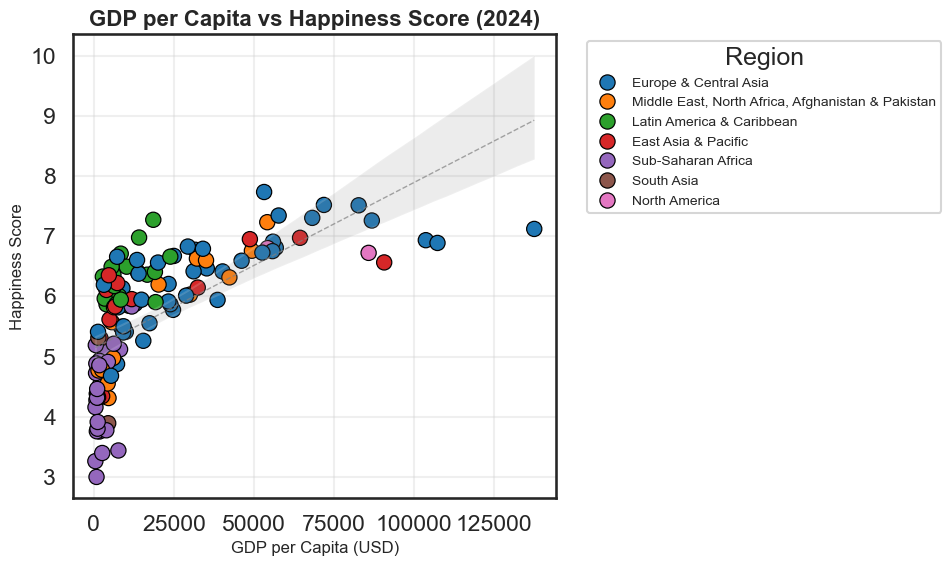

In [77]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot: GDP vs Happiness, colored by Region
sns.scatterplot(
    data=df_gdp_2024,
    x='GDP per Capita',
    y='Happiness Score',
    hue='Region',
    s=120,               # Slightly larger points for visibility
    palette='tab10',
    edgecolor='black'    # Adds a subtle border to points for clarity
)

# Optional: add a subtle trendline
sns.regplot(
    data=df_gdp_2024,
    x='GDP per Capita',
    y='Happiness Score',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': '--', 'alpha': 0.7}
)

# Titles and labels
plt.title('GDP per Capita vs Happiness Score (2024)', fontsize=16, weight='bold')
plt.xlabel('GDP per Capita (USD)', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Grid for better readability
plt.grid(alpha=0.3)

# Move legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()

Health vs Happiness 2024 (Scatter)

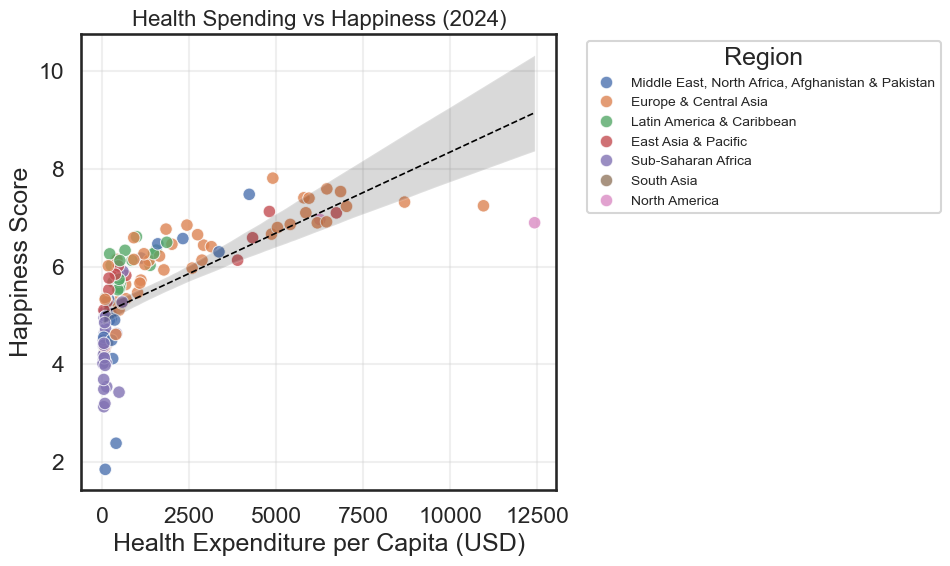

In [83]:
health_2023 = left_wide[left_wide['Year'] == 2022]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=health_2023,
    x='Health Expenditure (per capita)',
    y='Happiness Score',
    hue='Region',
    alpha=0.8
)
sns.regplot(
    data=health_2023,
    x='Health Expenditure (per capita)',
    y='Happiness Score',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'linewidth': 1.2}
)
plt.title('Health Spending vs Happiness (2024)', fontsize=16)
plt.xlabel('Health Expenditure per Capita (USD)')
plt.ylabel('Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

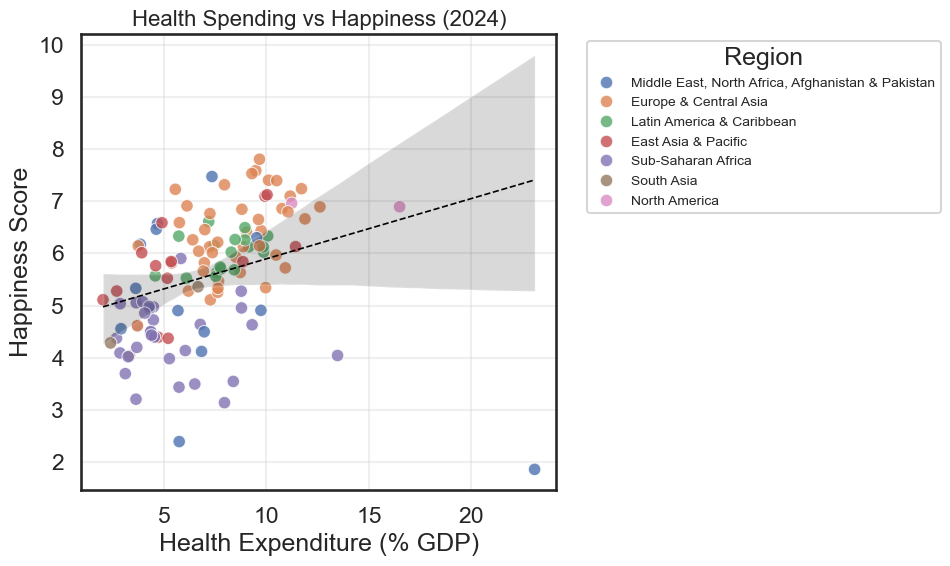

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=health_2023,
    x='Health Expenditure (% GDP)',
    y='Happiness Score',
    hue='Region',
    alpha=0.8
)
sns.regplot(
    data=health_2023,
    x='Health Expenditure (% GDP)',
    y='Happiness Score',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'linewidth': 1.2}
)
plt.title('Health Spending vs Happiness (2024)', fontsize=16)
plt.xlabel('Health Expenditure (% GDP)')
plt.ylabel('Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Life expectancy vs happiness 2024

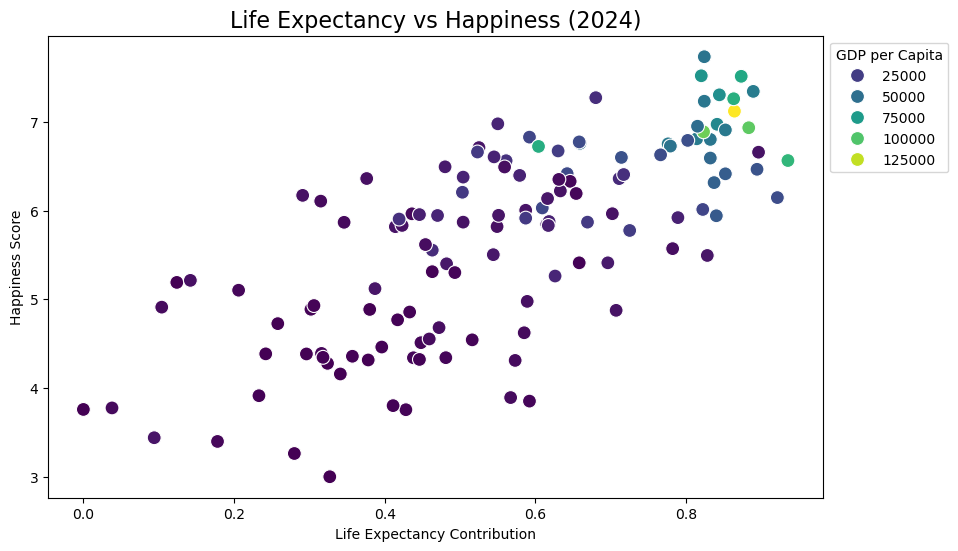

In [19]:
# Step 1: Filter single year
df_life_2024 = left_wide_advanced[left_wide_advanced['Year'] == 2024]

# Step 2: Scatter plot with color as GDP
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    data=df_life_2024, 
    x='Life Expectancy Contribution', 
    y='Happiness Score',
    hue='GDP per Capita',
    palette='viridis',
    s=100
)
plt.title('Life Expectancy vs Happiness (2024)', fontsize=16)
plt.xlabel('Life Expectancy Contribution')
plt.ylabel('Happiness Score')
plt.legend(title='GDP per Capita', bbox_to_anchor=(1,1))
plt.show()

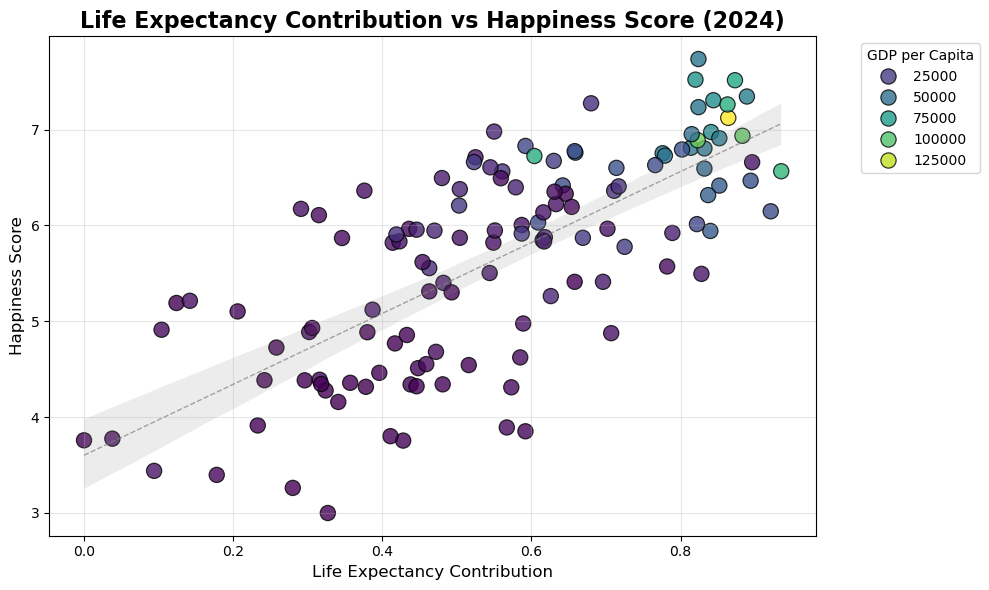

In [44]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot: Life Expectancy Contribution vs Happiness, colored by GDP per Capita
scatter = sns.scatterplot(
    data=df_life_2024,
    x='Life Expectancy Contribution',
    y='Happiness Score',
    hue='GDP per Capita',
    palette='viridis',
    s=120,                # Slightly larger points for visibility
    edgecolor='black',    # Adds subtle border to points for clarity
    alpha=0.8             # Slight transparency to reduce overlap clutter
)

# Optional: add a subtle trendline
sns.regplot(
    data=df_life_2024,
    x='Life Expectancy Contribution',
    y='Happiness Score',
    scatter=False,
    color='gray',
    line_kws={'linewidth': 1, 'linestyle': '--', 'alpha': 0.7}
)

# Titles and labels
plt.title('Life Expectancy Contribution vs Happiness Score (2024)', fontsize=16, weight='bold')
plt.xlabel('Life Expectancy Contribution', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Grid for better readability
plt.grid(alpha=0.3)

# Move legend outside the plot
plt.legend(title='GDP per Capita', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()


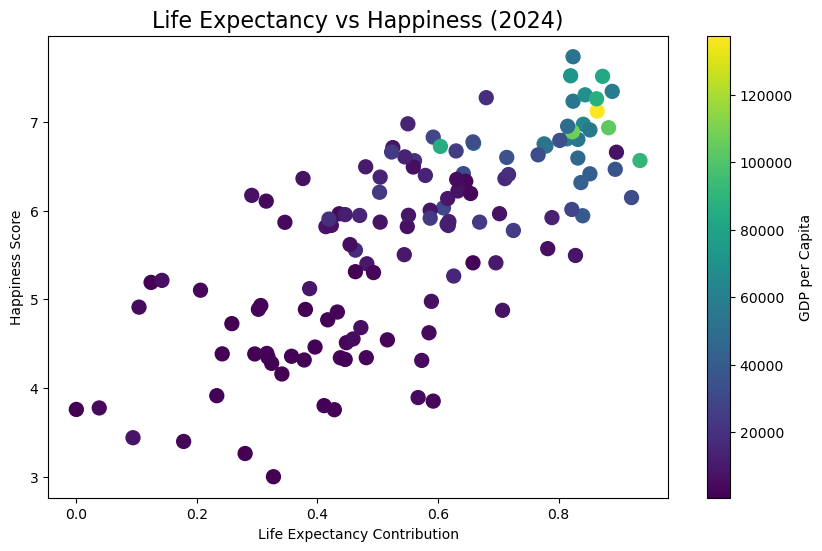

In [20]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df_life_2024['Life Expectancy Contribution'], 
    df_life_2024['Happiness Score'],
    c=df_life_2024['GDP per Capita'], 
    cmap='viridis', 
    s=100
)
plt.colorbar(scatter, label='GDP per Capita')
plt.title('Life Expectancy vs Happiness (2024)', fontsize=16)
plt.xlabel('Life Expectancy Contribution')
plt.ylabel('Happiness Score')
plt.show()

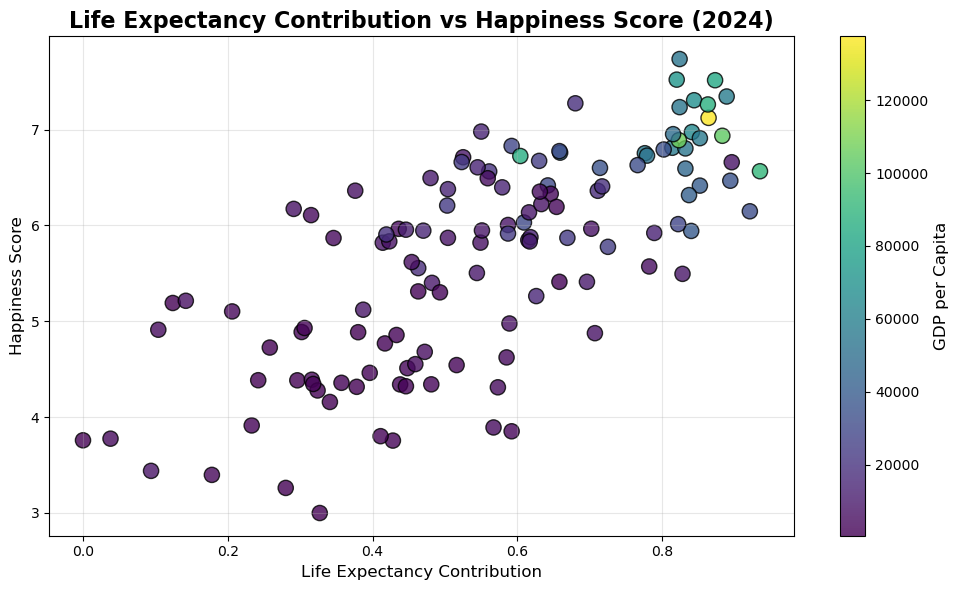

In [45]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot: Life Expectancy Contribution vs Happiness, colored by GDP per Capita
scatter = plt.scatter(
    df_life_2024['Life Expectancy Contribution'],
    df_life_2024['Happiness Score'],
    c=df_life_2024['GDP per Capita'],  # Color by GDP
    cmap='viridis',                    # Color palette
    s=120,                             # Slightly larger points for visibility
    edgecolor='black',                 # Adds subtle borders to points
    alpha=0.8                          # Slight transparency to reduce overlap
)

# Add colorbar for GDP per Capita
cbar = plt.colorbar(scatter)
cbar.set_label('GDP per Capita', fontsize=12)

# Add titles and labels
plt.title('Life Expectancy Contribution vs Happiness Score (2024)', fontsize=16, weight='bold')
plt.xlabel('Life Expectancy Contribution', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()


Adult Literacy vs Happiness 2024 (Scatter)

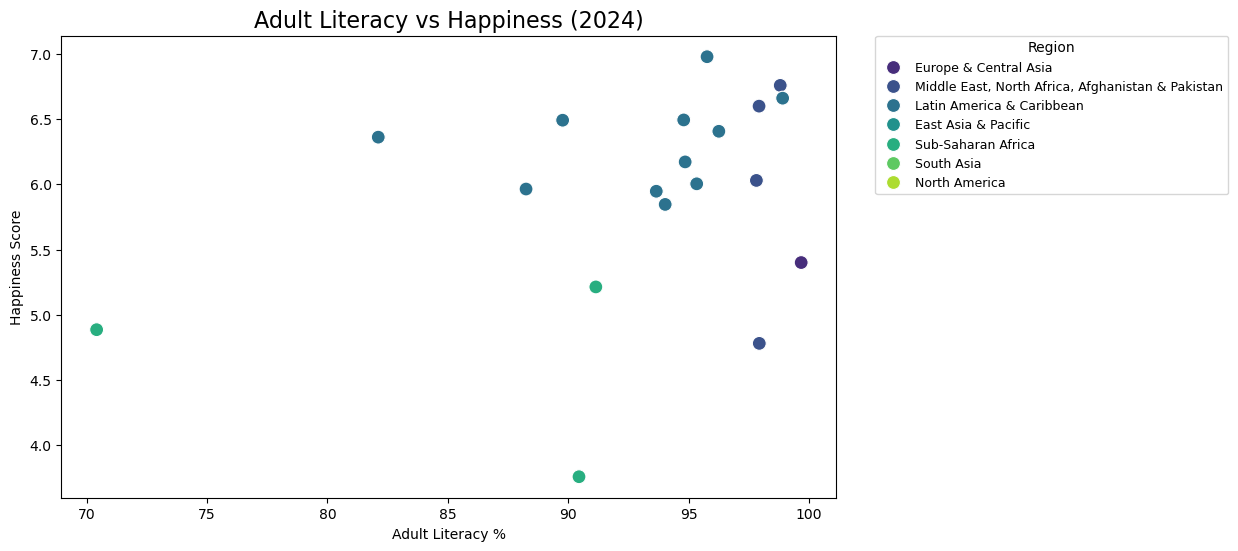

In [25]:
df_edu_2024 = left_wide[left_wide['Year'] == 2024]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_edu_2024, x='Adult Literacy %', y='Happiness Score',
                hue='Region', s=100, palette='viridis')
plt.title('Adult Literacy vs Happiness (2024)', fontsize=16)
plt.xlabel('Adult Literacy %')
plt.ylabel('Happiness Score')

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region')

plt.show()

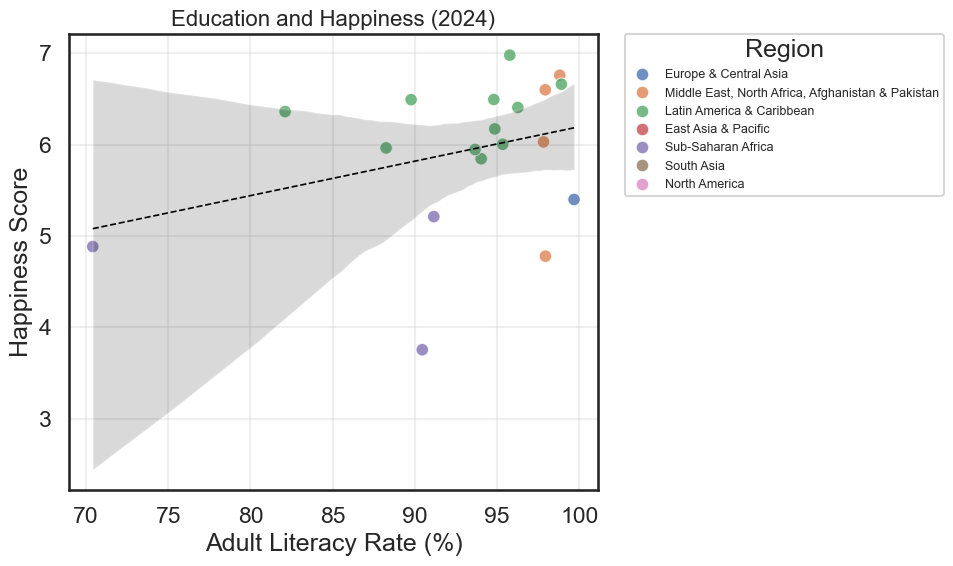

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_edu_2024,
    x='Adult Literacy %',
    y='Happiness Score',
    hue='Region',
    alpha=0.8
)
sns.regplot(
    data=df_edu_2024,
    x='Adult Literacy %',
    y='Happiness Score',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'linewidth': 1.2}
)
plt.title('Education and Happiness (2024)', fontsize=16)
plt.xlabel('Adult Literacy Rate (%)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Education expenditure (% GDP) vs happiness 2024

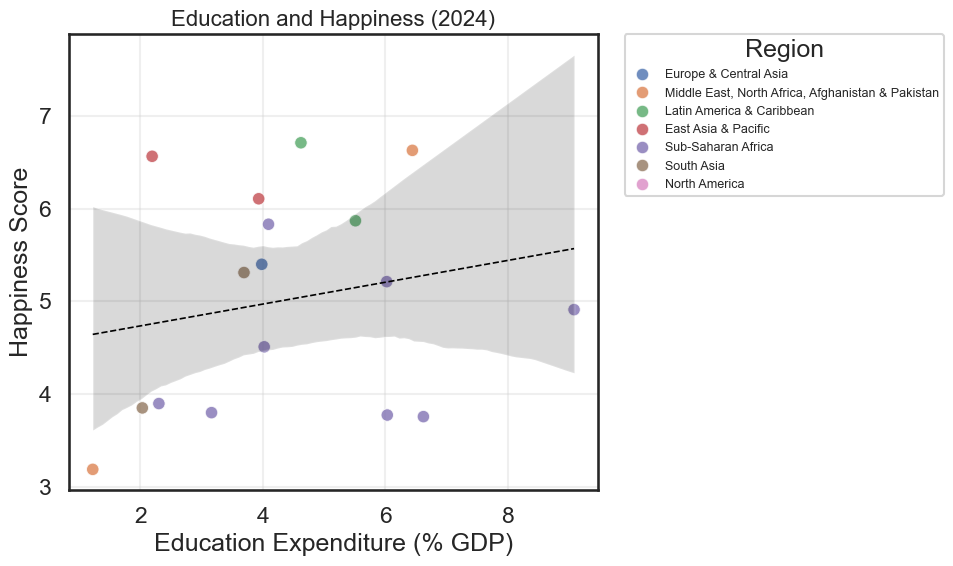

In [88]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_edu_2024,
    x='Education Expenditure (% GDP)',
    y='Happiness Score',
    hue='Region',
    alpha=0.8
)
sns.regplot(
    data=df_edu_2024,
    x='Education Expenditure (% GDP)',
    y='Happiness Score',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'linewidth': 1.2}
)
plt.title('Education and Happiness (2024)', fontsize=16)
plt.xlabel('Education Expenditure (% GDP)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Happiness 2024 (Bar Chart) Regional Avg

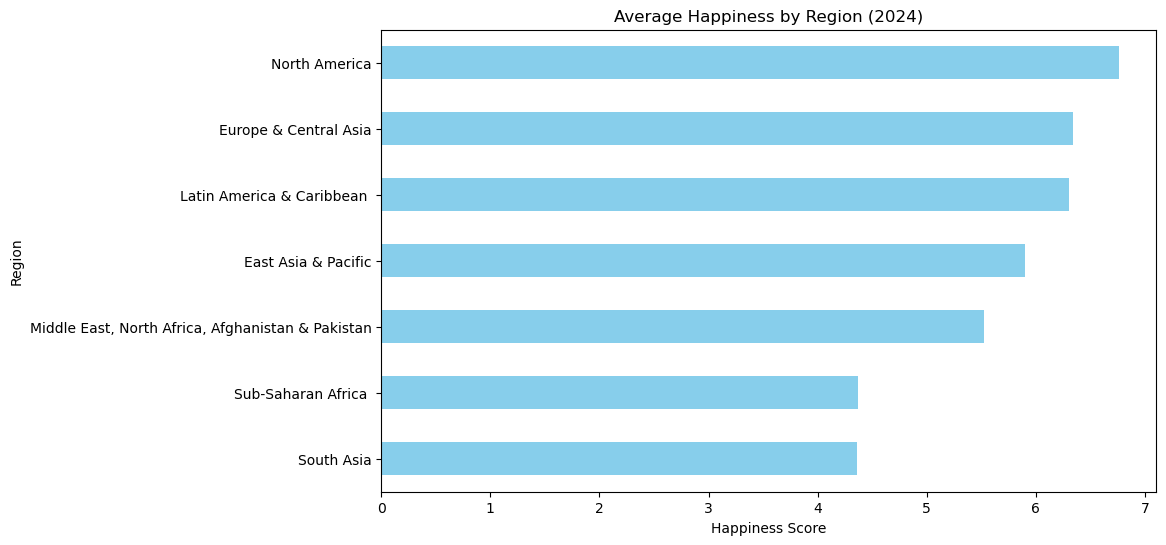

In [28]:
region_avg_happiness = df_edu_2024.groupby('Region')['Happiness Score'].mean().sort_values()

plt.figure(figsize=(10,6))
region_avg_happiness.plot(kind='barh', color='skyblue')
plt.title('Average Happiness by Region (2024)')
plt.xlabel('Happiness Score')
plt.show()

Education expenditure (% GDP)/adult literacy vs Happiness 2024 (Bubble Chart)

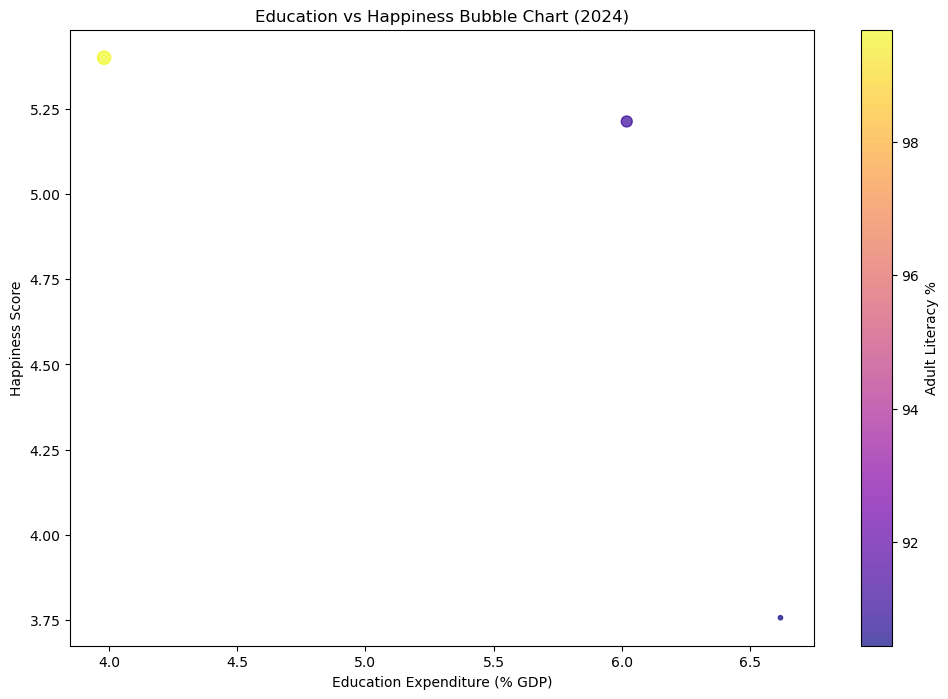

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(df_edu_2024['Education Expenditure (% GDP)'], df_edu_2024['Happiness Score'],
            s=df_edu_2024['GDP per Capita']*0.01,
            c=df_edu_2024['Adult Literacy %'], cmap='plasma', alpha=0.7)
plt.colorbar(label='Adult Literacy %')
plt.xlabel('Education Expenditure (% GDP)')
plt.ylabel('Happiness Score')
plt.title('Education vs Happiness Bubble Chart (2024)')
plt.show()

Combined Perspective/Bubble Chart

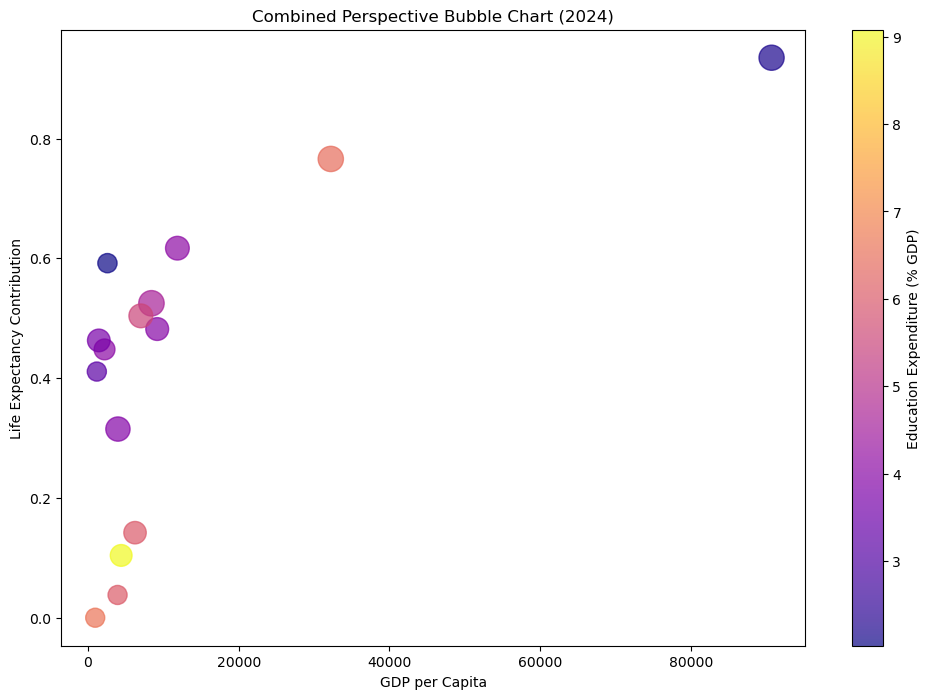

In [31]:
df_combined_2024 = left_wide_advanced[left_wide_advanced['Year'] == 2024]

plt.figure(figsize=(12,8))
plt.scatter(df_combined_2024['GDP per Capita'], df_combined_2024['Life Expectancy Contribution'],
            s=df_combined_2024['Happiness Score']*50,
            c=df_combined_2024['Education Expenditure (% GDP)'], cmap='plasma', alpha=0.7)
plt.colorbar(label='Education Expenditure (% GDP)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy Contribution')
plt.title('Combined Perspective Bubble Chart (2024)')
plt.show()

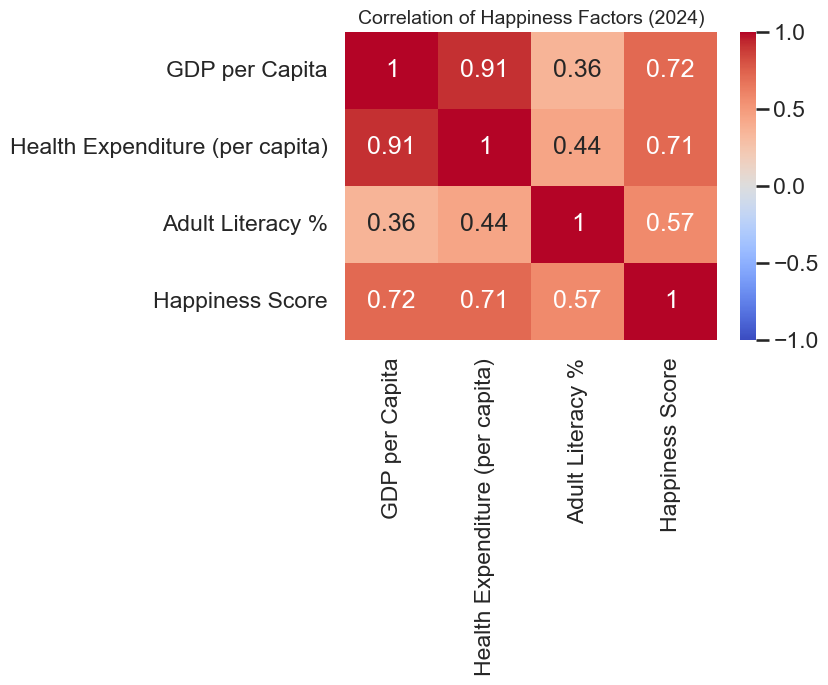

In [90]:
combined_factors = left_wide[['GDP per Capita', 'Health Expenditure (per capita)', 'Adult Literacy %', 'Happiness Score']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(combined_factors, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Happiness Factors (2024)', fontsize=14)
plt.show()

What If Scenario

c:\Users\Newforce\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\Newforce\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\Newforce\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



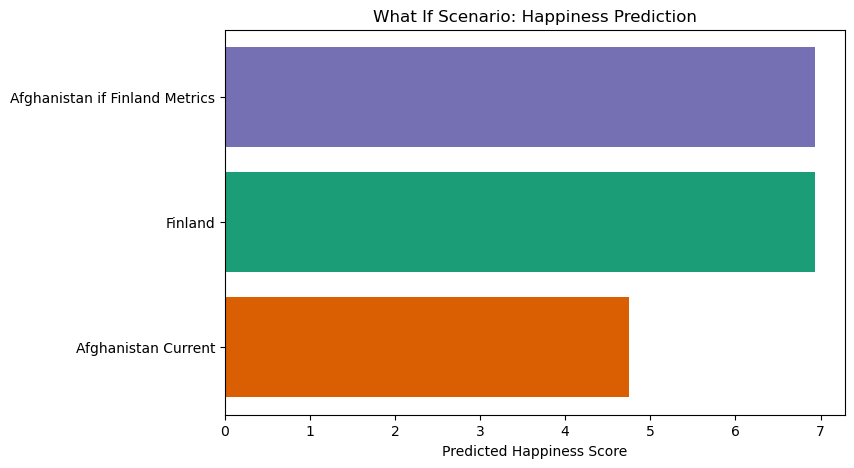

In [33]:
# Step 1: Choose predictors & target
predictors = ['GDP per Capita', 'Life Expectancy Contribution', 'Education Expenditure (% GDP)']
target = 'Happiness Score'

# Step 1a: Prepare model dataset (drop rows with missing values for model training)
model_df = left_wide_advanced.dropna(subset=predictors + [target])

X = model_df[predictors]
y = model_df[target]

# Step 1b: Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1c: Train Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Step 2: Pick countries
happy_country = 'Finland'
unhappy_country = 'Afghanistan'

# Step 2a: Extract predictor values for the countries
happy_metrics = left_wide_advanced[left_wide_advanced['Country']==happy_country][predictors].mean()

# Fill NaN for unhappy country using the mean of each predictor across all countries
unhappy_metrics = left_wide_advanced[left_wide_advanced['Country']==unhappy_country][predictors]
unhappy_metrics_filled = unhappy_metrics.fillna(left_wide_advanced[predictors].mean()).iloc[0]  # take the first row after fill

# Step 3: Scale & predict
happy_scaled = scaler.transform([happy_metrics])
unhappy_scaled = scaler.transform([unhappy_metrics_filled])

pred_happy = model.predict(happy_scaled)[0]
pred_unhappy = model.predict(unhappy_scaled)[0]

# Step 4: Simulate Afghanistan with Finland's metrics
unhappy_like_happy_scaled = scaler.transform([happy_metrics])
pred_unhappy_like_happy = model.predict(unhappy_like_happy_scaled)[0]

# Step 5: Plot
plt.figure(figsize=(8,5))
plt.barh([f'{unhappy_country} Current', happy_country, f'{unhappy_country} if {happy_country} Metrics'],
         [pred_unhappy, pred_happy, pred_unhappy_like_happy],
         color=['#d95f02','#1b9e77','#7570b3'])
plt.xlabel('Predicted Happiness Score')
plt.title('What If Scenario: Happiness Prediction')
plt.show()

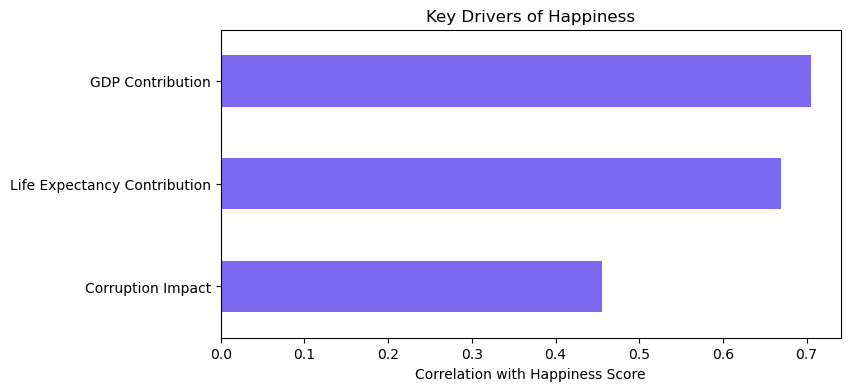

In [35]:
drivers = ['GDP Contribution', 'Life Expectancy Contribution', 'Corruption Impact']
correlations = left_wide_advanced[drivers + ['Happiness Score']].corr()['Happiness Score'].drop('Happiness Score')

plt.figure(figsize=(8,4))
correlations.sort_values().plot(kind='barh', color='mediumslateblue')
plt.xlabel('Correlation with Happiness Score')
plt.title('Key Drivers of Happiness')
plt.show()

Regional trends over multiple years

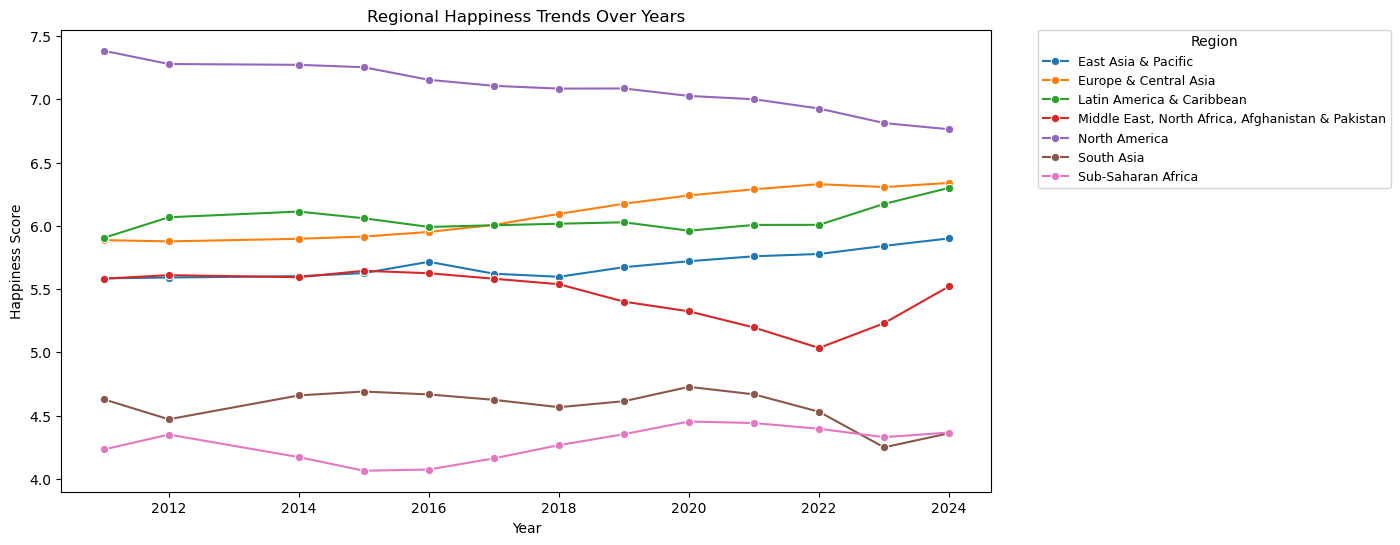

In [37]:
# Example: Average Happiness over years by Region
df_region_year = left_wide.groupby(['Year','Region'])['Happiness Score'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_region_year, x='Year', y='Happiness Score', hue='Region', marker='o')
plt.title('Regional Happiness Trends Over Years')

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region')

plt.show()

Seaborn scatterplot shows how economic wealth (gdp per capita) relates to happiness score.

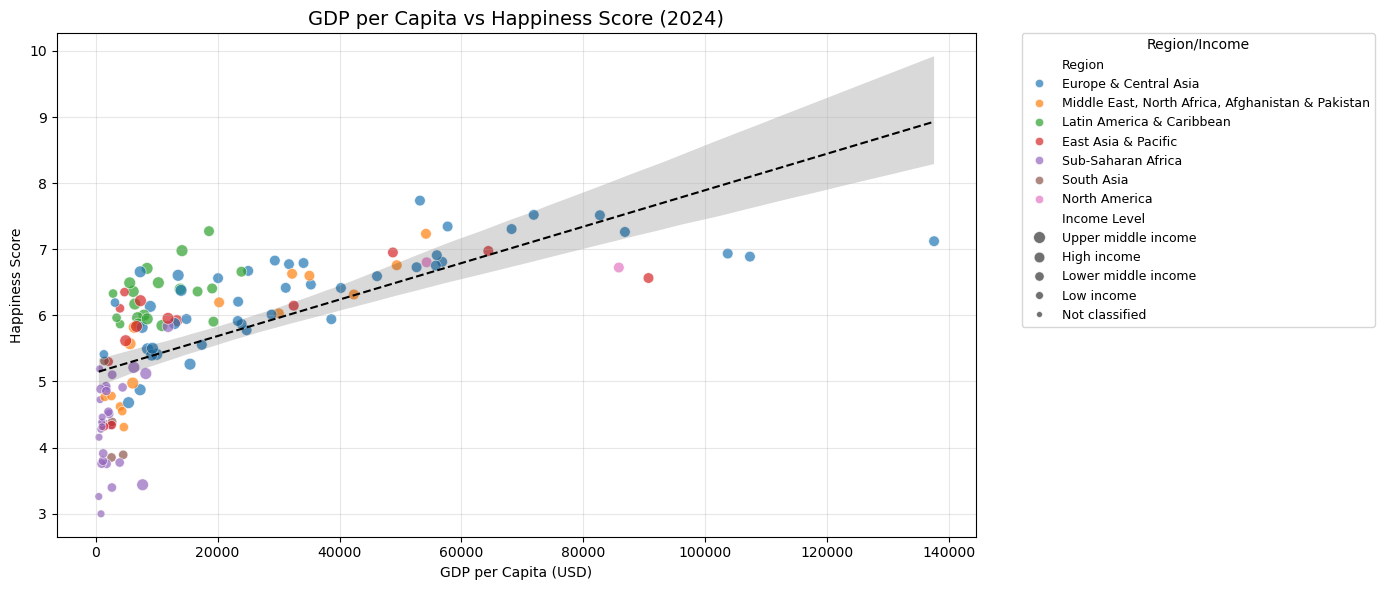

In [40]:
# Filter for a specific year (important for readability)
df = left_wide[left_wide['Year'] == 2024]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='GDP per Capita',
    y='Happiness Score',
    hue='Region',
    size='Income Level',
    alpha=0.7
)

# Add a trendline
sns.regplot(
    data=df,
    x='GDP per Capita',
    y='Happiness Score',
    scatter=False,  # Don’t duplicate points
    color='black',
    line_kws={'linewidth': 1.5, 'linestyle': '--'}
)

# Add titles and labels
plt.title('GDP per Capita vs Happiness Score (2024)', fontsize=14)
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Happiness Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region/Income')

plt.show()

Plotly scatterplot shows how economic wealth (gdp per capita) relates to happiness score.

In [46]:
# Use df variable above for filtered 2024 data
# Create the scatter plot
fig = px.scatter(
    df,
    x='GDP per Capita',
    y='Happiness Score',
    color='Region',
    #size='Health Expenditure (% GDP)',  # Optional: bubble size for extra insight
    hover_name='Country',
    hover_data=['Income Level'],
    trendline='ols',                    # Adds trendline automatically
    title='GDP per Capita vs Happiness Score (2024)',
    template='plotly_white'
)

fig.update_xaxes(type='log')

# Customize layout for readability
fig.update_layout(
    xaxis_title='GDP per Capita (USD)',
    yaxis_title='Happiness Score',
    legend_title='Region'
)

fig.show()

In [ ]:
df['Health Expenditure (% GDP)'].info()
df['Health Expenditure (% GDP)'].isna().sum()

Plotly scatterplot shows how economic wealth (gdp per capita) relates to happiness score over time.

In [ ]:
# # Use the full dataframe (no filter by year)
# df1 = left_wide.copy()

# # Build the animated scatter
# fig = px.scatter(
#     df1,
#     x='GDP per Capita',
#     y='Happiness Score',
#     color='Region',                       # Different colors for each region
#     #size='Health Expenditure (% GDP)',    # Optional: bubble size
#     hover_name='Country',                 # Country name on hover
#     hover_data=['Income Level'],          # Extra hover info
#     animation_frame='Year',               # This creates the animation
#     animation_group='Country',            # Keeps the same country bubbles connected
#     title='GDP per Capita vs Happiness Score Over Time',
#     template='plotly_white'
# )

# # Make the GDP axis logarithmic (to better show differences)
# fig.update_xaxes(type='log')

# # Change animation speed
# fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

# # Tidy up labels and layout
# fig.update_layout(
#     xaxis_title='GDP per Capita (log scale)',
#     yaxis_title='Happiness Score',
#     legend_title='Region',
#     font=dict(size=12)
# )

# # Display the animation
# fig.show()

In [ ]:
# fig = px.scatter(
#     df1,
#     x='GDP per Capita',
#     y='Happiness Score',
#     #size='Health Expenditure (per capita)',
#     color='Region',
#     hover_name='Country',
#     animation_frame='Year',
#     animation_group='Country',
#     title='GDP per Capita vs Happiness Over Time by Region',
#     template='plotly_white'
# )

# # Change animation speed
# fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

# fig.update_layout(
#     xaxis_title='GDP per Capita',
#     yaxis_title='Happiness Score',
#     legend_title='Region'
# )

# fig.show()

Plotly scatterplot shows how life expectancy relates to happiness score.

In [ ]:
# Copy the dataset
df2 = left_wide_advanced.copy()

fig = px.scatter(
    df2,
    x='Health Expenditure (per capita)',
    y='Happiness Score',
    color='GDP per Capita',
    hover_name='Country',
    #size='GDP per Capita',
    trendline='ols',
    color_continuous_scale='Viridis',
    title='Life Expectancy Proxy (Health Spending) vs Happiness'
)

fig.update_layout(
    xaxis_title='Health Expenditure per Capita (USD)',
    yaxis_title='Happiness Score',
    coloraxis_colorbar=dict(title='GDP per Capita'),
    template='plotly_white'
)

fig.show()

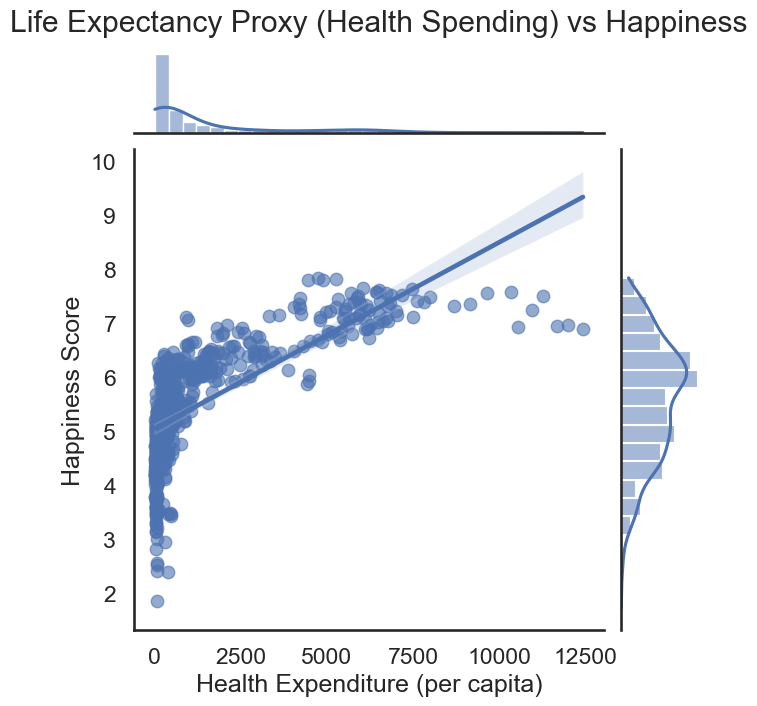

In [ ]:
sns.set_theme(style="white", context="talk")

# Scatter with regression + histograms
sns.jointplot(
    data=df2,
    x='Health Expenditure (per capita)',
    y='Happiness Score',
    kind='reg',  # adds regression line
    height=7,
    scatter_kws={'alpha': 0.6}
)

plt.suptitle('Life Expectancy Proxy (Health Spending) vs Happiness', y=1.02)
plt.show()

In [ ]:
fig = px.scatter(
    df2,
    x='Health Expenditure (per capita)',
    y='Happiness Score',
    color='Region',
    #size='GDP per Capita',
    hover_name='Country',
    title='Life Expectancy Proxy (Health Spending) vs Happiness by Region',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Health Expenditure per Capita (USD)',
    yaxis_title='Happiness Score',
    legend_title='Region',
    showlegend=True
)

fig.show()

In [ ]:
fig = px.scatter(
    df2,
    x='Life Expectancy Contribution',
    y='Happiness Score',
    color='Region',                 # Color by region
    #size='GDP Contribution',        # Bubble size reflects GDP contribution
    hover_name='Country',      # Shows country on hover
    title='Health (Life Expectancy) vs Happiness by Region (2023)',
    template='plotly_white'
)

# Layout customization
fig.update_layout(
    xaxis_title='Life Expectancy Contribution',
    yaxis_title='Happiness Score',
    legend_title='Region'
)

fig.show()

In [ ]:
fig = px.scatter(
    df2,
    x='Life Expectancy Contribution',
    y='Happiness Score',
    color='Region',                  # Color by region
    #size='GDP Contribution',         # Bubble size = GDP contribution
    hover_name='Country',            # Country name on hover
    animation_frame='Year',          # Animate over years
    animation_group='Country',       # Keeps same country bubble across years
    title='Life Expectancy Contribution vs Happiness Over Time',
    template='plotly_white'
)

# Change animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

# Layout tweaks
fig.update_layout(
    xaxis_title='Life Expectancy Contribution',
    yaxis_title='Happiness Score',
    legend_title='Region'
)

fig.show()

Education vs happiness visuals options.

In [52]:
fig = px.scatter(
    df,
    x='Adult Literacy %',
    y='Happiness Score',
    color='Region',           # Add region for context
    hover_name='Country',
    title='Adult Literacy vs Happiness (Left Merge)',
    template='plotly_white'
)
fig.show()

In [53]:
fig = px.scatter(
    df2,
    x='Adult Literacy %',
    y='Happiness Score',
    size='GDP Contribution',             # Bubble size = GDP contribution
    color='Region',                      # Color by region
    hover_name='Country',
    hover_data=['Primary School Enrollment %', 'Secondary School Enrollment %'],
    title='Happiness vs Literacy (Bubble Chart, Left Merge)',
    template='plotly_white'
)
fig.show()

In [54]:
fig = px.scatter(
    df,
    x='Adult Literacy %',
    y='Happiness Score',
    #size='GDP per Capita',
    color='Region',
    hover_name='Country',
    hover_data=['Primary School Enrollment %', 'Secondary School Enrollment %'],
    title='Happiness vs Literacy (Bubble Chart, Inner Merge)',
    template='plotly_white'
)
fig.show()

In [55]:
fig = px.scatter(
    df2,
    x='Adult Literacy %',
    y='Happiness Score',
    #size='GDP Contribution',
    color='Region',
    hover_name='Country',
    animation_frame='Year',      # Animate over years
    animation_group='Country',   # Keep bubbles consistent across frames
    title='Adult Literacy vs Happiness Over Time by Region',
    template='plotly_white'
)

# Change animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

# Layout tweaks
fig.update_layout(
    xaxis_title='Adult Literacy (%)',
    yaxis_title='Happiness Score',
    legend_title='Region'
)

fig.show()

In [56]:
# Create bins for literacy
df2['Literacy Level'] = pd.cut(df2['Adult Literacy %'], bins=5)

# Average happiness per bin
avg_happiness = df2.groupby('Literacy Level')['Happiness Score'].mean().reset_index()

fig = px.bar(
    avg_happiness,
    x='Literacy Level',
    y='Happiness Score',
    title='Average Happiness by Literacy Level (Left Merge)',
    template='plotly_white'
)
fig.show()

C:\Users\Newforce\AppData\Local\Temp\ipykernel_47580\241063452.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



TypeError: Object of type Interval is not JSON serializable

In [57]:
import plotly.graph_objects as go

metrics = ['Adult Literacy %', 'Primary School Enrollment %', 'Secondary School Enrollment %', 'Tertiary School Enrollment %']
avg_metrics = left_wide[metrics + ['Happiness Score']].groupby(left_wide['Region']).mean().reset_index()

fig = go.Figure()
for metric in metrics:
    fig.add_trace(go.Bar(
        x=avg_metrics['Region'],
        y=avg_metrics[metric],
        name=metric
    ))

fig.update_layout(
    barmode='group',
    title='Average Education Metrics by Region',
    xaxis_title='Region',
    yaxis_title='Percentage / Score',
    template='plotly_white'
)
fig.show()

Plotly scatterplot shows corruption impact impacts happiness over time.

In [58]:
# Create animated scatter
fig = px.scatter(
    left_wide_advanced,
    x='Corruption Impact',
    y='Happiness Score',
    #size='GDP Contribution',
    color='Region',
    hover_name='Country',
    animation_frame='Year',
    animation_group='Country',
    title='Corruption Impact vs Happiness Over Time by Region',
    template='plotly_white'
)

# Change animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

# Layout improvements
fig.update_layout(
    xaxis_title='Corruption Impact (Lower = More Trust)',
    yaxis_title='Happiness Score',
    legend_title='Region'
)

fig.show()

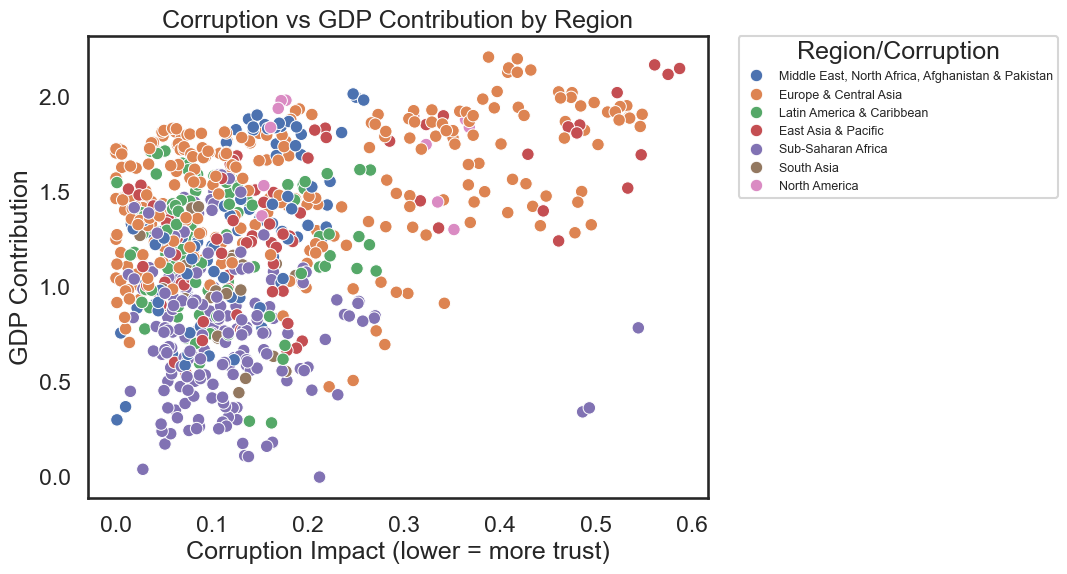

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df2,
    x='Corruption Impact',
    y='GDP Contribution',
    hue='Region'
)
plt.title('Corruption vs GDP Contribution by Region')
plt.xlabel('Corruption Impact (lower = more trust)')
plt.ylabel('GDP Contribution')

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region/Corruption')

plt.show()

In [ ]:
fig = px.scatter(
    df2,
    x='Corruption Impact',
    y='GDP Contribution',
    size='Happiness Score',
    color='Region',
    hover_name='Country',
    animation_frame='Year',
    animation_group='Country',
    title='Corruption Impact vs GDP Contribution Over Time',
    template='plotly_white'
)

# Change animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

fig.update_layout(
    xaxis_title='Corruption Impact (lower = more trust)',
    yaxis_title='GDP Contribution',
    legend_title='Region'
)
fig.show()

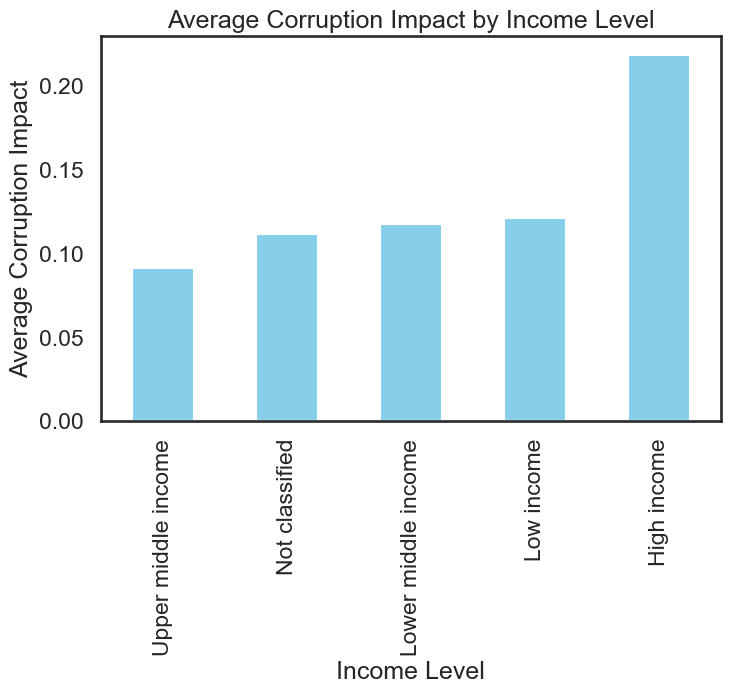

In [60]:
# Average corruption per income group
corruption_by_income = df2.groupby('Income Level')['Corruption Impact'].mean().sort_values()

corruption_by_income.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Average Corruption Impact by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Corruption Impact')
plt.show()

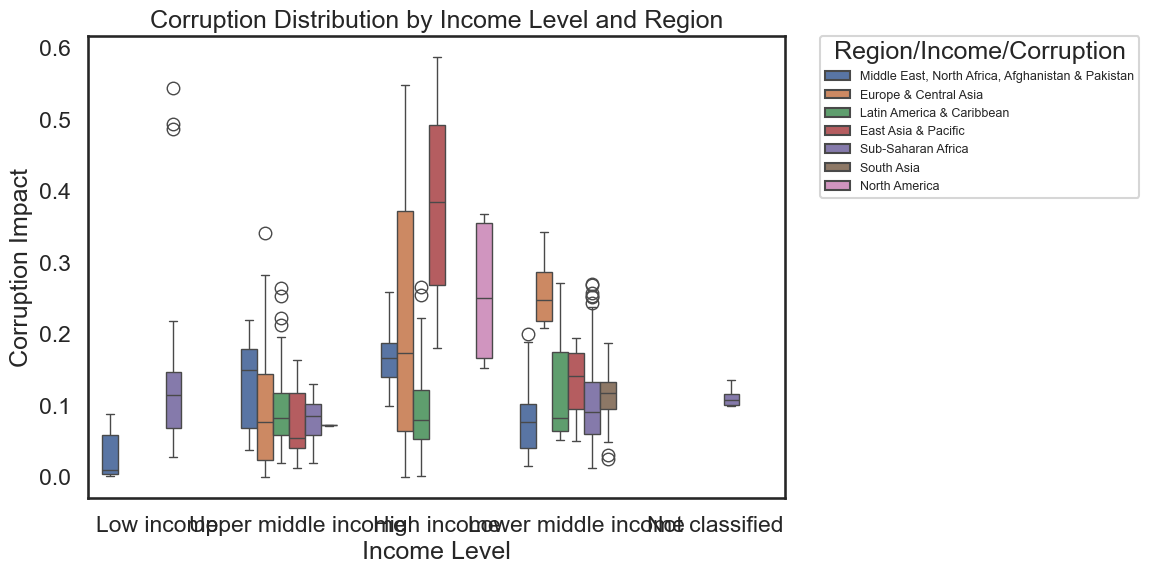

In [61]:
plt.figure(figsize=(9,6))
sns.boxplot(
    data=df2,
    x='Income Level',
    y='Corruption Impact',
    hue='Region'
)
plt.title('Corruption Distribution by Income Level and Region')
plt.xlabel('Income Level')
plt.ylabel('Corruption Impact')

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region/Income/Corruption')

plt.show()

In [ ]:
fig = px.scatter(
    df,
    x='Income Level',
    y='Happiness Score',
    #size='GDP per Capita',
    color='Region',
    hover_name='Country',
    animation_frame='Year',
    animation_group='Country',
    title='Income Level vs Happiness Over Time',
    template='plotly_white'
)
fig.show()

This visualizaiton shows how gdp and life expectancy interact with happiness while layering in education.

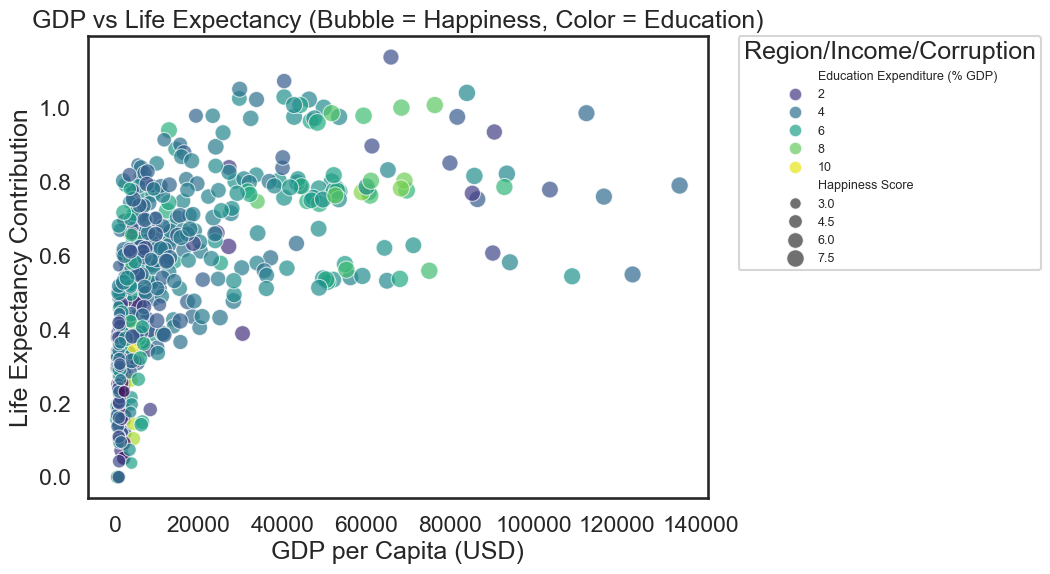

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df2,
    x='GDP per Capita',
    y='Life Expectancy Contribution',
    size='Happiness Score',
    hue='Education Expenditure (% GDP)',
    palette='viridis',
    alpha=0.7
)
plt.title('GDP vs Life Expectancy (Bubble = Happiness, Color = Education)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Life Expectancy Contribution')

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='Region/Income/Corruption')

plt.show()

In [64]:
fig = px.scatter(
    df2,
    x='GDP per Capita',
    y='Life Expectancy Contribution',
    size='Happiness Score',
    color='Education Expenditure (% GDP)',
    hover_name='Country',
    animation_frame='Year',
    animation_group='Country',
    color_continuous_scale='Viridis',
    size_max=40,
    title='Combined View: GDP, Life Expectancy, Happiness, and Education Over Time',
    template='plotly_white'
)

# Change animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

fig.update_layout(
    xaxis_title='GDP per Capita (USD)',
    yaxis_title='Life Expectancy Contribution',
    coloraxis_colorbar_title='Education Exp (% GDP)'
)
fig.show()

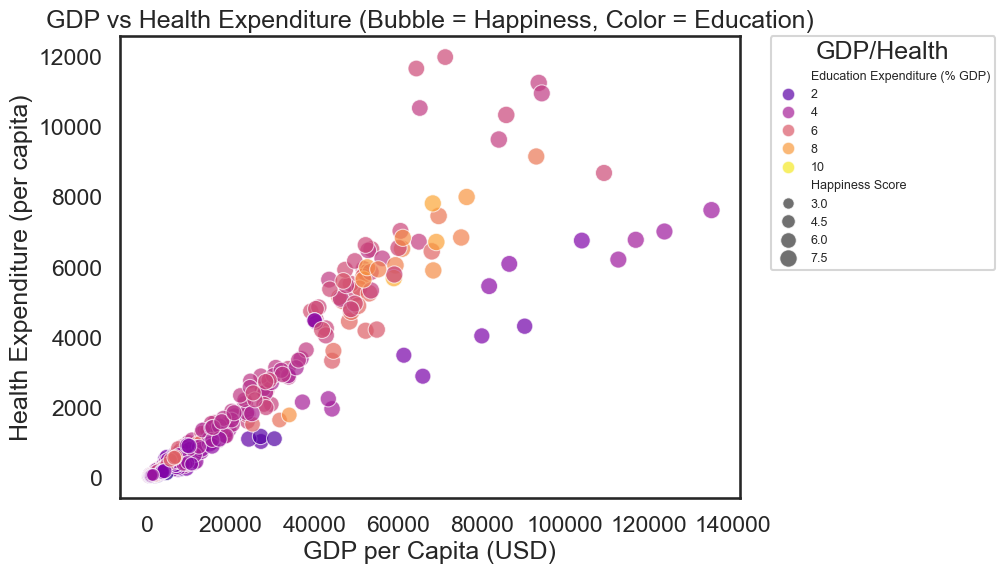

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df2,
    x='GDP per Capita',
    y='Health Expenditure (per capita)',
    size='Happiness Score',
    hue='Education Expenditure (% GDP)',
    palette='plasma',
    alpha=0.7
)
plt.title('GDP vs Health Expenditure (Bubble = Happiness, Color = Education)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Health Expenditure (per capita)')

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='GDP/Health')

plt.show()

In [66]:
fig = px.scatter(
    df2,
    x='GDP per Capita',
    y='Health Expenditure (per capita)',
    size='Happiness Score',
    color='Education Expenditure (% GDP)',
    hover_name='Country',
    animation_frame='Year',
    animation_group='Country',
    color_continuous_scale='Plasma',
    size_max=40,
    title='Combined View: GDP, Health, Happiness, and Education',
    template='plotly_white'
)

# Change animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

fig.update_layout(
    xaxis_title='GDP per Capita (USD)',
    yaxis_title='Health Expenditure (per capita)',
    coloraxis_colorbar_title='Education Exp (% GDP)'
)
fig.show()

These visualizations show which factors are most associated with happiness score.

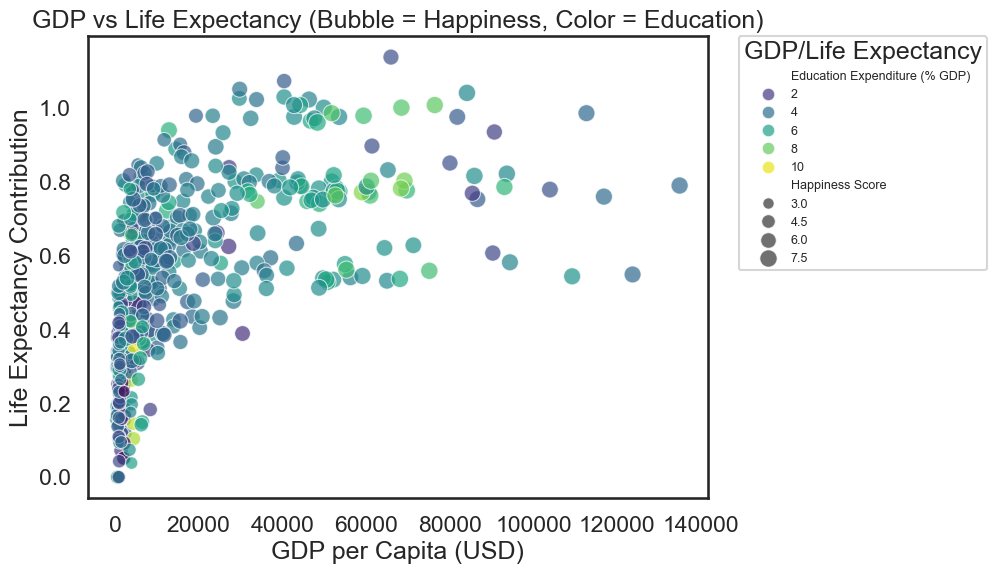

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df2,
    x='GDP per Capita',
    y='Life Expectancy Contribution',
    size='Happiness Score',
    hue='Education Expenditure (% GDP)',
    palette='viridis',
    alpha=0.7
)
plt.title('GDP vs Life Expectancy (Bubble = Happiness, Color = Education)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Life Expectancy Contribution')
# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=9, title='GDP/Life Expectancy')

plt.show()

In [ ]:
fig = px.scatter(
    df2,
    x='GDP per Capita',
    y='Life Expectancy Contribution',
    size='Happiness Score',
    color='Education Expenditure (% GDP)',
    hover_name='Country',
    animation_frame='Year',
    animation_group='Country',
    color_continuous_scale='Viridis',
    size_max=40,
    title='Combined View: GDP, Life Expectancy, Happiness, and Education Over Time',
    template='plotly_white'
)

# Change animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # milliseconds per frame

fig.update_layout(
    xaxis_title='GDP per Capita (USD)',
    yaxis_title='Life Expectancy Contribution',
    coloraxis_colorbar_title='Education Exp (% GDP)'
)
fig.show()

In [68]:
# Select the core columns
cols = [
    'Happiness Score',
    'GDP per Capita',
    'Life Expectancy Contribution',
    'Education Expenditure (% GDP)',
    'Health Expenditure (per capita)',
    'Corruption Impact'
]

# Make a clean working copy
left_wide_advanced_copy = left_wide_advanced[cols].copy()

# Drop missing rows (important for accurate correlation)
left_wide_advanced_copy = left_wide_advanced_copy.dropna()

In [69]:
corr = df2.corr(numeric_only=True)
corr_target = corr['Happiness Score'].drop('Happiness Score').sort_values(ascending=True)
print(corr_target)

Happiness Rank                    -0.978783
longitude                         -0.170137
Primary School Enrollment %       -0.098590
Year                               0.037654
Health Expenditure (% GDP)         0.355145
Education Expenditure (% GDP)      0.362012
latitude                           0.408140
Corruption Impact                  0.455398
Adult Literacy %                   0.561997
Tertiary School Enrollment %       0.614106
Life Expectancy Contribution       0.669854
GDP per Capita                     0.701886
Secondary School Enrollment %      0.704562
GDP Contribution                   0.705412
Health Expenditure (per capita)    0.713786
Name: Happiness Score, dtype: float64


C:\Users\Newforce\AppData\Local\Temp\ipykernel_47580\435770951.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




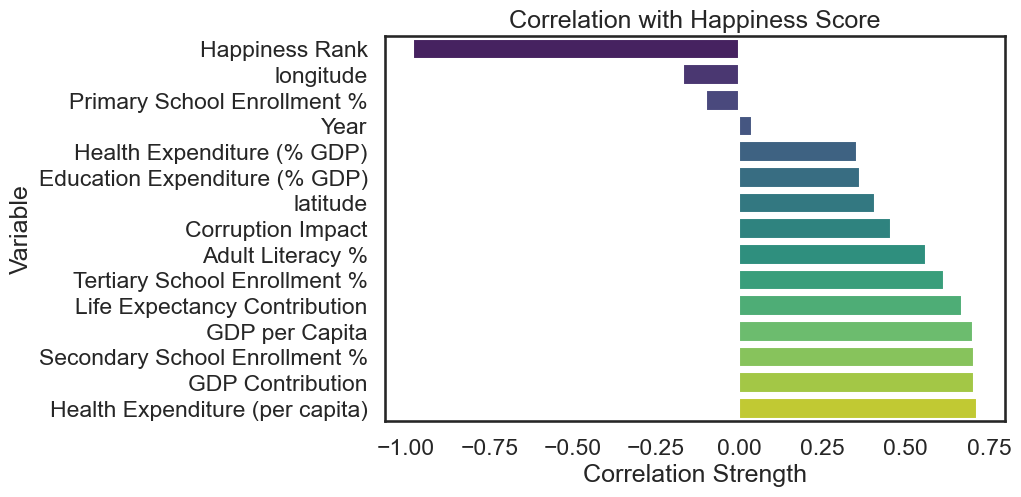

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    palette='viridis'
)
plt.title('Correlation with Happiness Score')
plt.xlabel('Correlation Strength')
plt.ylabel('Variable')
plt.show()

In [71]:
corr_df = corr_target.reset_index()
corr_df.columns = ['Variable', 'Correlation']

fig = px.bar(
    corr_df,
    x='Correlation',
    y='Variable',
    color='Correlation',
    color_continuous_scale='Viridis',
    orientation='h',
    title='Key Drivers of Happiness (Correlation Strength)',
    template='plotly_white'
)
fig.update_layout(
    xaxis_title='Correlation with Happiness Score',
    yaxis_title='Variable'
)
fig.show()

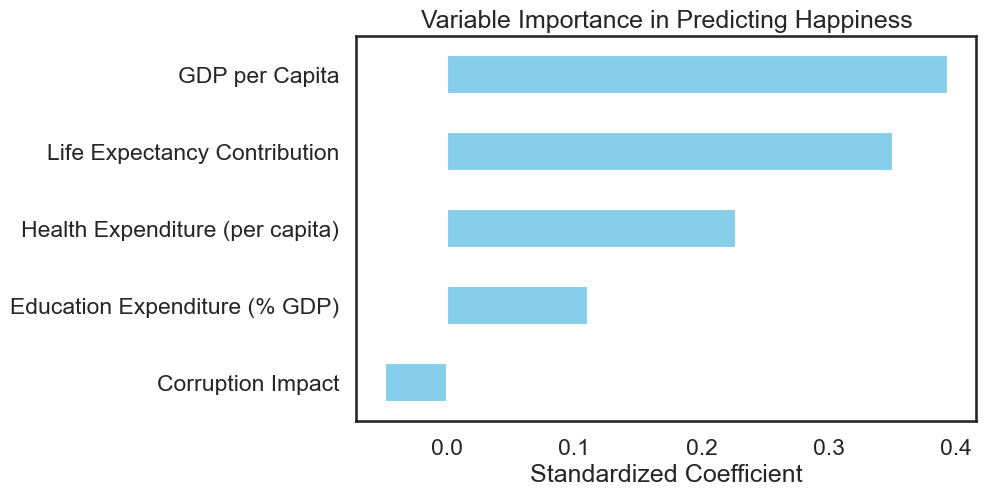

In [72]:
# Prepare X and y
X = left_wide_advanced_copy.drop(columns='Happiness Score')
y = left_wide_advanced_copy['Happiness Score']

# Standardize (so coefficients are comparable)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit regression
model = LinearRegression()
model.fit(X_scaled, y)

# Get coefficients
importance = pd.Series(model.coef_, index=X.columns).sort_values()

# Visualize
plt.figure(figsize=(8,5))
importance.plot(kind='barh', color='skyblue')
plt.title('Variable Importance in Predicting Happiness')
plt.xlabel('Standardized Coefficient')
plt.show()